In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

# Importing train data csv

In [12]:
#importing the train csv

import pandas as pd

plants=pd.read_csv('../plantbase/data/priority_plants_VF.csv').drop(columns='Unnamed: 0')

In [13]:
plants.head(10)

,id,family,genus,species,content
0,100005,Lamiaceae,Ajuga,Ajuga reptans L.,Flower
1,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower
2,100144,Malvaceae,Malva,Malva sylvestris L.,Flower
3,10019,Orchidaceae,Ophrys,Ophrys apifera Huds.,Flower
4,100190,Geraniaceae,Geranium,Geranium sylvaticum L.,Flower
5,100201,Rosaceae,Crataegus,Crataegus germanica (L.) Kuntze,Flower
6,100229,Fabaceae,Trifolium,Trifolium alpinum L.,Flower
7,100255,Violaceae,Viola,Viola odorata L.,Flower
8,100273,Scrophulariaceae,Verbascum,Verbascum thapsus L.,Flower
9,100303,Rosaceae,Crataegus,Crataegus germanica (L.) Kuntze,Flower


# Understanding the train data balance & setting class_weights

In [28]:
#Class names based on genus
class_names={0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

{'Ajuga': 0,
 'Allium': 1,
 'Campanula': 2,
 'Cirsium': 3,
 'Crataegus': 4,
 'Gentiana': 5,
 'Geranium': 6,
 'Iris': 7,
 'Malva': 8,
 'Narcissus': 9,
 'Ophrys': 10,
 'Rosa': 11,
 'Trifolium': 12,
 'Verbascum': 13,
 'Veronica': 14,
 'Viola': 15}

In [29]:
#flipping the dictionary so we can assign class number to every genus
class_numbers= {} 
for key, value in class_names.items(): 
   if value in class_numbers: 
       class_numbers[value].append(key) 
   else: 
       class_numbers[value]=key 
        
class_numbers

{'Ajuga': 0,
 'Allium': 1,
 'Campanula': 2,
 'Cirsium': 3,
 'Crataegus': 4,
 'Gentiana': 5,
 'Geranium': 6,
 'Iris': 7,
 'Malva': 8,
 'Narcissus': 9,
 'Ophrys': 10,
 'Rosa': 11,
 'Trifolium': 12,
 'Verbascum': 13,
 'Veronica': 14,
 'Viola': 15}

In [45]:
#Assigning the class number to each genus
plants['class']=plants['genus'].map(class_numbers)

plants.head()

,id,family,genus,species,content,class
0,100005,Lamiaceae,Ajuga,Ajuga reptans L.,Flower,0
1,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,7
2,100144,Malvaceae,Malva,Malva sylvestris L.,Flower,8
3,10019,Orchidaceae,Ophrys,Ophrys apifera Huds.,Flower,10
4,100190,Geraniaceae,Geranium,Geranium sylvaticum L.,Flower,6


In [46]:
#understanding how unbalanced our data set is
plants.groupby('class').count().sort_values(by='id',ascending=True)

,id,family,genus,species,content
class,,,,,
0,119,119,119,119,119
11,150,150,150,150,150
7,154,154,154,154,154
4,183,183,183,183,183
14,200,200,200,200,200
12,214,214,214,214,214
9,223,223,223,223,223
3,231,231,231,231,231
1,232,232,232,232,232


In [44]:
#setting class_weights based on the class 10. 
#Essentially we treating every instance of the classes as instances of class 10
# For example weight of 4 for class 0 means: 
    #treat every instance of class 0 as 4 instances of class 10

class_weight = {0:4. ,
                1:2., 
                2:1.5 ,
                3:2.,
                4:3.,
                5:2.,
                6:1.5,
                7:4.,
                8:2.,
                9:3.,
                10:1.,
                11:4.,
                12:3.,
                13:2.,
                14:3.,
                15:2.
               }

# Loading the images into train and validation sets

Load the images

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
#setting the directory for the train dataset
directory = r"../raw_data/train"

In [74]:
#augmenting the data using : horizontal flips, adapting the horiztontal width, shear range, zooming and rotating the images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=90,
        validation_split = 0.2)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split = 0.2)

In [75]:
img_height, img_width = (256,256)

In [76]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = valid_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


# Training baseline model

In [77]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [81]:
num_classes = 16

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [82]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)            

In [84]:
epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    class_weight=class_weight,
    epochs = epochs)

Epoch 1/10
108/108 [==============================] - 118s 1s/step - loss: 5.9098 - accuracy: 0.1231 - val_loss: 2.5967 - val_accuracy: 0.1538
Epoch 2/10
108/108 [==============================] - 115s 1s/step - loss: 5.2706 - accuracy: 0.1794 - val_loss: 2.3313 - val_accuracy: 0.2608
Epoch 3/10
108/108 [==============================] - 115s 1s/step - loss: 4.8560 - accuracy: 0.2608 - val_loss: 2.2987 - val_accuracy: 0.2368
Epoch 4/10
108/108 [==============================] - 142s 1s/step - loss: 4.6632 - accuracy: 0.2891 - val_loss: 2.0717 - val_accuracy: 0.3377
Epoch 5/10
108/108 [==============================] - 133s 1s/step - loss: 4.4367 - accuracy: 0.3422 - val_loss: 1.9365 - val_accuracy: 0.4135
Epoch 6/10
108/108 [==============================] - 117s 1s/step - loss: 4.2862 - accuracy: 0.3626 - val_loss: 1.8873 - val_accuracy: 0.4147
Epoch 7/10
108/108 [==============================] - 137s 1s/step - loss: 4.0392 - accuracy: 0.4046 - val_loss: 1.8961 - val_accuracy: 0.3930

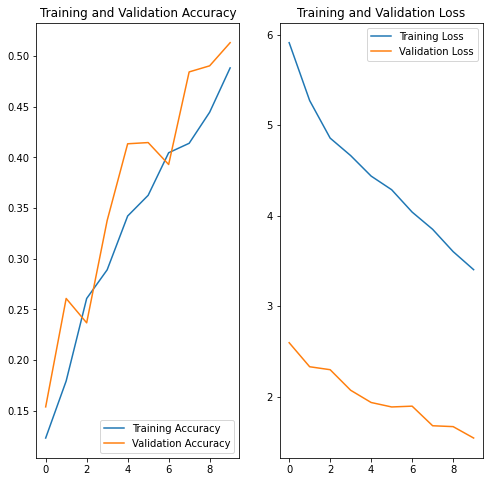

In [86]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Checking succession rate

# VGG model